# Hi! This is the tutorial of PyCTRSA! (be updating)

### PyCTRSA is a Python Toolbox for Cross-Temporal Representational Similarity Analysis(RSA)-based Decoding for E/MEG data.

### Author
Zitong Lu

you can see more details about me here: [https://github.com/ZitongLu1996](https://github.com/ZitongLu1996)

### Download

> pip install pyctrsa

### Highlight
CTRSA-based decoding is a new algorithm for cross-temporal E/MEG decoding by RSA. We use the neural data from two different time-points to establish a Cross-Temporal Representatonal Dissimilarity Matrix (RDM) corrsponding to time i and time j. By this train of thought, we can obtain Number_of_Times by Number_of_Times Cross-Temporal RDMs. Then we can establish a Coding Model RDM by the experimental hypothesis. Finally, we can calculate the similarity between this Coding Model RDM and the Number_of_Times by Number_of_Times Cross-Temporal RDMs and obtain the cross-temporal decoding results.

### Notes
In PyCTRSA, you can not only calculate the cross-temporal similarities based on this novel methods to realize decoding, but also calculate the cross-temporal similarities based on neural data under two different conditions to see the similar data patterns between two conditions and calculate the the cross-temporal similarities based on normal RDMs to see the similar representational patterns between different time-points.

### Features in PyCTRSA
#### 1. Calculate the Cross-Temporal RDM (Novel here!)

    > calculate CTRDMs for a single channel/subject

    > calculate CTRDMs for multi-channels&subejcts

#### 2. Calculate the similarity between two CTRDMs (Novel here!)

    > by Pearson Correlation/Spearman Correlation/Kendall tau Correlation/Cosine Similarity/Euclidean Distance

#### 3. Calculate the Cross-Temporal Similarities

    > calculate CTSimilarities between neural data under two conditions

    > calculate CTSimilarities based on normal RDMs

    > calculate CTSimilarities between CTRDMs and a Coding Model RDM (Novel here!)

#### 4. Plot the Results

    > plot the CTRDM
    
    > plot the CTSimilarities
    
    > plot the time-by-time similarities

### Required Dependencies

$~~~~~~~~$[Numpy](https://www.numpy.org): a fundamental package for scientific computing.
    
$~~~~~~~~$[SciPy](https://www.scipy.org/scipylib/index.html): a package that provides many user-friendly and efficient numerical routines.
    
$~~~~~~~~$[Matplotlib](https://matplotlib.org): a Python 2D plotting library.]

$~~~~~~~~$[NeuroRA](https://zitonglu1996.github.io/NeuroRA/): a Python toolbox for multimode neural data Representation Analysis.]

## PyCTRSA Demo 
### Here, we provide a demo. By this demo, you will learn and know how to use PyCTRSA.
The data of this PyCTRSA Demo is based on Bae&Luck's work in 2018. All demo data are based on their Experiment 2's data.  You can find more details about the experiment and data information in their paper: [Bae, G.Y., Luck, S.J. (2018). Dissociable decoding of spatial attention and working memory from eeg oscillations and sustained potentials. The Journal of Neuroscience, 38(2), 409-422.](https://doi.org/10.1523/JNEUROSCI.2860-17.2017)

In this demo, we use the ERP data after 2-6Hz filtering and Alpha data after 8-12 Hz filtering and Hilbert transform.

In [1]:
import os
import numpy as np
from six.moves import urllib
from pyctrsa.util.progressbar import show_progressbar
from pyctrsa.util.download_data import schedule
from pyctrsa.util.unzip_data import unzipfile
from pyctrsa.util.preprocess_data import pre_data
from pyctrsa.ctrdm import single_cal, multi_cal
from pyctrsa.plotting import ctrdm
from pyctrsa.ctsimilarity import fitctrdm
import h5py

url = 'https://attachment.zhaokuangshi.cn/BaeLuck_2018jn_data.zip'
filename = 'BaeLuck_2018jn_data.zip'
data_dir = '/Users/zitonglu/Downloads/PyCTRSA-master-2/data/'
filepath = data_dir + filename

## Section 1 Downloading Demo Data

In [4]:
# Download the data
exist = os.path.exists(filepath)
if exist == False:
    os.makedirs(data_dir)
    urllib.request.urlretrieve(url, filepath, schedule)
    print('Download completes!')
elif exist == True:
    print('Data already exists!')

# unzip the data
unzipfile(filepath, data_dir)

Data already exists!
Unzip completes!


## Section 2 Data Preprocessing

In [5]:
# sub_ids in Exp
subs = ["201", "202", "203", "204", "205", "206", "207", "208", "209",
        "210", "212", "213", "215", "216", "217", "218"]

# preprocess
pre_data(subs, data_dir)

Preprocessing: [====================================================================================================] 100.00%

The data for PyCTRSA will be stored in data_dir+'data_for_CTRSA/' and the labels can be found in data_dir+'labels/'
After this preprocessing step, we can obtain a [16, 40, 27, 500] array for each feature & each subject & each type of neural data.
For example, the file, data_dir+'data_for_CTRSA/Alpha/201.h5', is for subject with ID '201'. It contains Alpha data for orientation decoding and Alpha data for position decoding.
You can get the Alpha data for orientation decoding and Alpha data for position by:

In [11]:
# read .h5 file
f = h5py.File(data_dir+'data_for_CTRSA/Alpha/201.h5', 'r')
# Alpha data for orientation decoding of sub201
ori_subdata = np.array(f['ori'])
# Alpha data for position decoding of sub201
pos_subdata = np.array(f['pos'])
f.close()

# print the shape of data 
print(ori_subdata.shape)

(16, 40, 27, 500)


Some explanations here:
    
> 6: the number of conditions (here means 16 different orientation degrees)

> 40: the number of trials

> 27: the number of channels

> 500: the number of time-points (from -500 ms to 1500 ms, sample rate: 250 Hz)

## Section 3 Calculating and Plotting Cross-Temporal RDMs

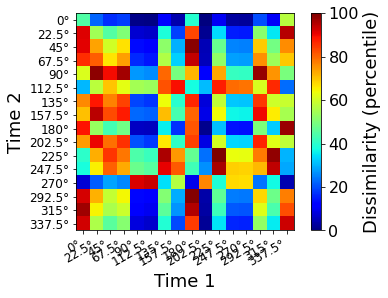

In [3]:
# calculate the CTRDMs for a single channel & a single subject

# here we choose the ERP position data of 1st channel of sub201, firstly
f = h5py.File(data_dir+'data_for_CTRSA/ERP/201.h5', 'r')
data_pos_ERP_sub201chl1 = np.array(f['pos'])[:, :, 0]
f.close()

# avgerage the trials
data_pos_ERP_sub201chl1 = np.average(data_pos_ERP_sub201chl1, axis=1)
# calculate the CTRDMs
# here, time_win=5 and time_step=5 (5 time-points corresponding to 10ms in this Experiment)
CTRDM_pos_ERP_sub201chl1 = single_cal.ctrdm_cal(data_pos_ERP_sub201chl1, time_win=5, time_step=5)

# save the CTRDMs
exist = os.path.exists('test_results/')
if exist == False:
    os.makedirs('test_results/')
f = h5py.File('test_results/CTRDM_pos_ERP_sub201chl1.h5', 'w')
f.create_dataset('CTRDMs', data=CTRDM_pos_ERP_sub201chl1)
f.close()

# plot one of the CTRDMs (time 1: 10 ms, time 2: 20 ms, the time of stimulus onset is 0 ms)
conditions = ["0°", "22.5°", "45°", "67.5°", "90°", "112.5°", "135°", "157.5°", "180°",
              "202.5°", "225°", "247.5°", "270°", "292.5°", "315°", "337.5°"]
ctrdm.ctrdm_plot(CTRDM_pos_ERP_sub201chl1[30, 35], percentile=True, conditions=conditions)

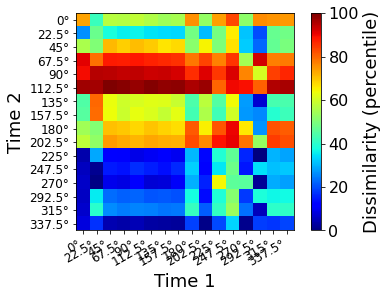

In [4]:
# calculate the CTRDMs for all channels & subjects

# here we use the ERP position data of all channels & subjects
nsubs = len(subs)
data_pos_ERP = np.zeros([16, nsubs, 40, 27, 500], dtype=np.float)
subindex = 0
for sub in subs:
    print('Loading data of sub'+sub)
    f = h5py.File(data_dir+'data_for_CTRSA/ERP/'+sub+'.h5', 'r')
    pos_subdata = np.array(f['pos'])
    f.close()
    data_pos_ERP[:, subindex] = pos_subdata
    subindex = subindex + 1

# avgerage the trials
data_pos_ERP = np.average(data_pos_ERP, axis=2)
# calculate the CTRDMs
CTRDM_pos_ERP = multi_cal.ctrdms_cal(data_pos_ERP, sub_opt=1, chl_opt=0, time_win=5, time_step=5)
# shape of CTRDMs: [16, 100, 100, 16, 16]

# save the CTRDMs
f = h5py.File('test_results/CTRDM_pos_ERP.h5', 'w')
f.create_dataset('CTRDMs', data=CTRDM_pos_ERP)
f.close()

# plot one of the CTRDMs (time 1: 10 ms, time 2: 20 ms, the time of stimulus onset is 0 ms) averaging the subjects
CTRDM_pos_ERP_10ms_20ms = np.average(CTRDM_pos_ERP, axis=0)[30, 35]
conditions = ["0°", "22.5°", "45°", "67.5°", "90°", "112.5°", "135°", "157.5°", "180°",
              "202.5°", "225°", "247.5°", "270°", "292.5°", "315°", "337.5°"]
ctrdm.ctrdm_plot(CTRDM_pos_ERP_10ms_20ms, percentile=True, conditions=conditions)

## Section 4 Calculating and Plotting Cross-Temporal Similarities

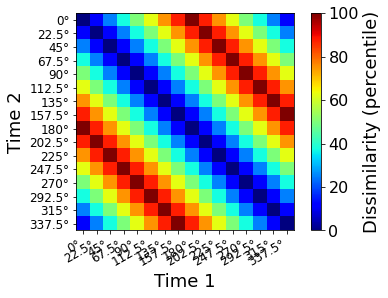

In [5]:
# establish a Position-Coding RDM
# In this model RDM, the representational dissimilarities between two positions are larger
# when the difference between these two positions are large and the dissimilarities between
# two positions are smaller when the difference between these two positions are small.
pos_model_RDM = np.zeros([16, 16], dtype=np.float)
for i in range(16):
    for j in range(16):
        diff = np.abs(i-j)
        if diff <= 8:
            pos_model_RDM[i, j] = diff/8
        else:
            pos_model_RDM[i, j] = (16-diff)/8

# plot the Position-Coding RDM
ctrdm.ctrdm_plot(pos_model_RDM, percentile=True, conditions=conditions)

In [6]:
# calculate the CTSimilarities between CTRDMs and Position-Coding RDM
CTSim_pos_ERP = fitctrdm.ctsimilarities_cal(CTRDM_pos_ERP, pos_model_RDM)

# save the CTSimilarities
f = h5py.File('test_resutls/CTSimilarities_pos_ERP.h5', 'w')
f.create_dataset('CTSimilarities', data=CTSim_pos_ERP)
f.close()

# plot the time-by-time decoding results
tbytsimilarities.tbytsimilarities_plot(CTSim_pos_ERP, start_time=-0.5, end_time=1.5, color='orange', lim=[-0.1, 0.5])

# plot the Cross-Temporal decoding results
ctsimilarities.ctsimilarities_plot(CTSim_pos_ERP, start_time=-0.5, end_time=1.5, cmap='bwr', lim=[-0.08, 0.08])

IndexError: index 16 is out of bounds for axis 0 with size 16